## Temperature Data Visualisation

DATA SET 1: Average daily temperature in Kiel Holtenau from 1.06.1986 until 31.12.2022 in °C

DATA SET 2: Maximum daily temperature in Antarctica from 1.1.1989 until 17.4.2023 in °C

DATA SET 3: (Almost) daily temperature in Algiers (desert) from 27.11.1992 until 14.04.2023 in Fahrenheit. You can convert the data to °C yourself. Look up the conversion factor and give it a try! 

In [1]:
# this imports the python module numpy, which is necessary to load the data. We'll get to that later! 
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date, timedelta
import matplotlib.dates as dates


# Uncomment the following two lines if you want to look at Kiel temperatures
infile_Kiel = "ue_data/data_OBS_DEU_P1D_T2M_2564.csv"
Kiel_temp=np.loadtxt(infile_Kiel, delimiter=';', skiprows=1, usecols=3)
Kiel_dates=np.loadtxt(infile_Kiel, dtype=str, delimiter=';',skiprows=1, usecols=2)

# Uncomment the following two lines if you want to look at Antarctica temperatures
infile_Ant = "ue_data/IDCJAC0010_300017_1800_Data.csv"
Antarctica_temp=np.loadtxt(infile_Ant, delimiter=';', skiprows=1, usecols=5)
Antarctica_dates=np.loadtxt(infile_Ant, delimiter=';',skiprows=1,usecols=(2,3,4))

# Uncomment the following two lines if you want to look at Sahara temperatures. 
infile_Sahara="ue_data/algier(sahara)temperatures.csv"
Sahara_temp=np.loadtxt(infile_Sahara, delimiter=';',skiprows=1,usecols=1) 
Sahara_dates=np.loadtxt(infile_Sahara,delimiter=';',skiprows=1,usecols=0,dtype=str)
# Add a new line of code to convert the data to °C if you want


## Kiel Data

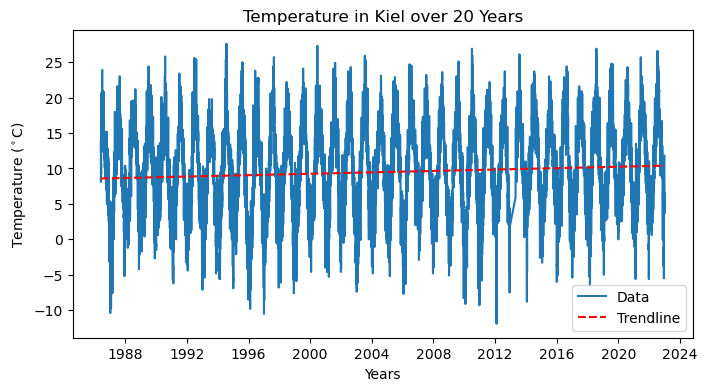

The maximum average daily temperature in Kiel was 27.6 °C and this was on the 28 July, 1994 . The trendline shows that the temperatures are shallowly increasing.


In [3]:
Kiel_dates = Kiel_dates.astype('datetime64',copy=False) # change to datetime rather than str
ndates = dates.date2num(Kiel_dates) # dates in integer form rather than datetime

# define figure
fig=plt.figure(figsize=(8,4))
# plot data
plt.plot(Kiel_dates, Kiel_temp, label='Data')

# create a trend line, calculate the trend and fit to data
k_trend= np.polyfit(ndates, Kiel_temp,1)
k_fit=np.poly1d(k_trend)
x_fit = np.linspace(ndates.min(), ndates.max())
plt.plot(dates.num2date(x_fit), k_fit(x_fit), "r--", label='Trendline')

# add titles
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Temperature in Kiel over 20 Years')
plt.legend()
plt.show()

ind=np.argmax(Kiel_temp)# Index of maximum Temperature
date_Mtemp=Kiel_dates[ind].astype(datetime.datetime) # find the date the max temp occured on
print('The maximum average daily temperature in Kiel was', max(Kiel_temp), '°C and this was on the', date_Mtemp.strftime('%d %B, %Y'),'. The trendline shows that the temperatures are shallowly increasing.')


## Antarctica Data

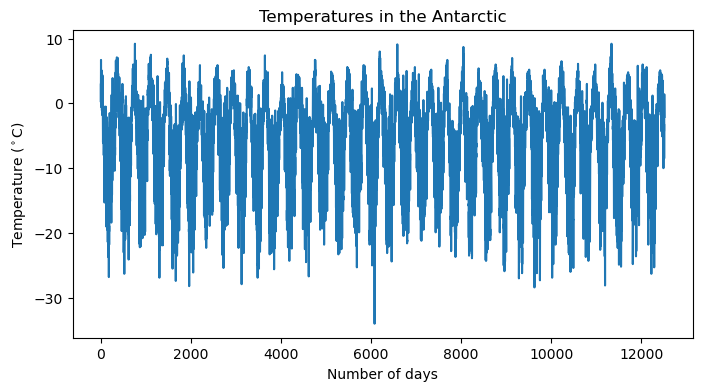

In [4]:
# define figure
fig=plt.figure(figsize=(8,4))

# plot data
plt.plot(Antarctica_temp)
# add titles
plt.xlabel('Number of days')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Temperatures in the Antarctic')
plt.show()

### A way to deal with the x axis

In [5]:
import pandas as pd # a module we can use to visulise data

Ant=pd.read_csv(infile_Ant, delimiter=';') # read in data 
Ant['Datetime']=pd.to_datetime(Ant[['Year', 'Month', 'Day']]) # create datetime object
# define variables
a_temp=Ant['Maximum temperature (Degree C)']
a_date=Ant['Datetime']

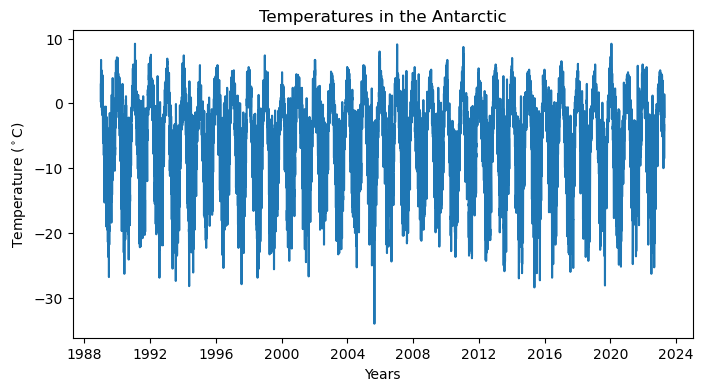

In [7]:
# define figure
fig=plt.figure(figsize=(8,4))

# plot data
plt.plot(a_date,a_temp)
# add titles
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Temperatures in the Antarctic')
plt.show()

## Sahara Data

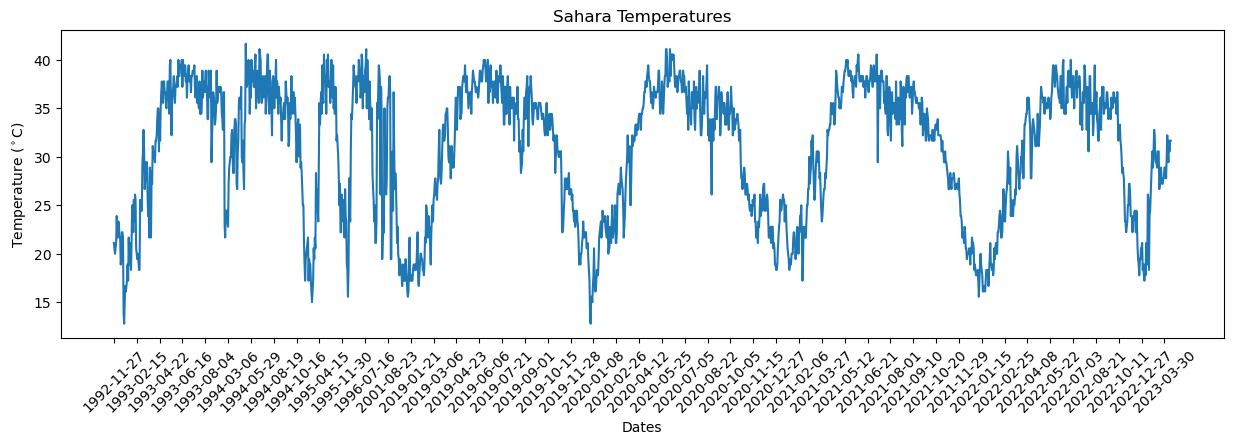

In [8]:
#convert to celsius
Sahara_cel=np.round((5*Sahara_temp/9 - 5*32/9),2)


#plot the temps
fig=plt.figure(figsize=(15,4))
plt.plot(Sahara_dates,Sahara_cel)
plt.xlabel('Dates')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Sahara Temperatures')
# make the temp labels less dense
plt.xticks(Sahara_dates[::40],  rotation=45)
plt.show()


## On the same graph??

In [ ]:
fig=plt.figure(figsize=(10,6))
# plot data
data1=plt.plot(Kiel_temp,label='Kiel')
data2=plt.plot(temp,label='Antarctica')
# add labels
plt.ylabel('Temperature ($^\circ$C)')
plt.xlabel('Number of days recorded')
plt.title('Kiel vs Antarctica')
# display a legend
plt.legend(loc='upper right')
plt.show()